# Thống kê các chuyến bay nội địa tại Việt Nam quý 1 năm 2021

## 1.Giới thiệu

   Năm 2021 là một năm chịu ảnh hưởng lớn của tình hình dịch bệnh Covid-19, và giai đoạn bắt đầu bùng phát dịch mạnh tại Việt Nam là vào Quý 1 năm 2021, chính vì vậy tất cả các hãng hàng không đều phải điều chỉnh một lượng lớn chuyến bay nội địa trong nước. Quý 1 năm 2021 bắt đầu cho sự thiệt hại lớn cho ngành hàng không Việt Nam.
Vậy dự án phân tích dưới đây sẽ cho chúng ta cái nhìn trực quan hơn về tình hình khai thác các chuyến bay tại Việt Nam. 

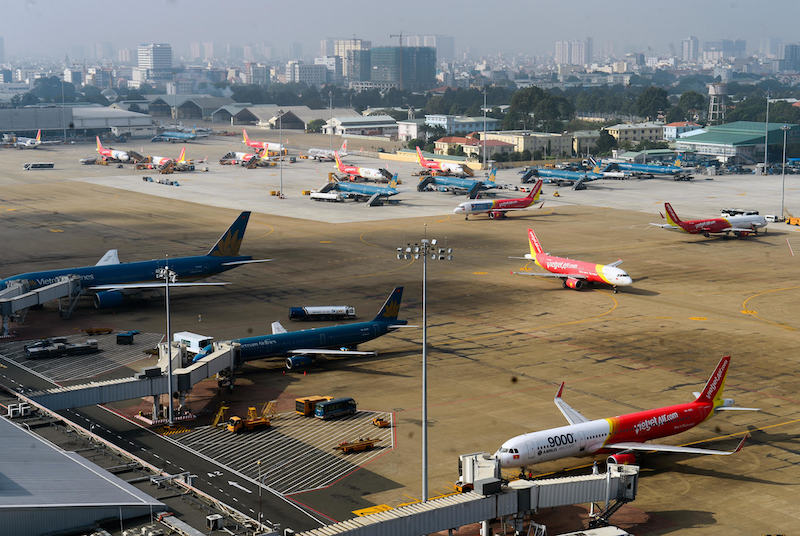

                                            Hình 1: Sân bay Nội Bài

## 2. Nguồn dữ liệu

Dữ liệu được sử dụng đã được đăng lên diễn đàn về Khoa Học Dữ liệu Kaggle (https://www.kaggle.com/datasets/nxhong93/vietnam-flight-airfare-042021) và các số liệu có nhắc đến được lấy tại các nguồn chính thống khác.

## 3. Mục tiêu phân tích

### 3.1 Nội dung phân tích


1. Có bao nhiêu hãng bay, đưa ra số chuyến bay của  họ trong năm 2021
2. Tính tổng giờ bay của các hãng, tính số giờ bay theo ngày và đêm
3. Lợi nhuận của các hãng thu về (giá gốc), tiền thuế (giá thuế), tổng doanh thu (giá tổng), so sánh
4. Thị phần hàng không Việt Nam (tính theo số chuyến bay)
5. Số chuyến bay cất cánh, hạ cánh tại các tỉnh, thành phố
6. Thời gian bay theo giờ, ngày, tần suất hạ/cất cánh
   - 6.1 Thời gian cất cánh trong ngày, thống kê
   - 6.2 Thời gian cất/hạ cánh bay thống kê theo buổi
   - 6.3 Thống kê về số chuyến bay cất cánh hạ cánh tại 3 sân bay lớn nhất VN
7. Thống kê hạng vé
8. Thống kê thời gian bay từ sân bay Nội Bài đi các sân bay trong nước



### 3.2. Các kỹ năng phân tích dữ liệu được sử dụng

1. Kiểm tra dữ liệu đầu vào
2. Chọn lọc và làm sạch dữ liệu cần dùng
3. Chuyển đổi loại dữ liệu
4. Phân tích chuỗi thời gian
5. Tách dữ liệu ra các bảng để phân tích chuyên sâu
6. Trực quan hóa dữ liệu

### 3.3 Các Fameworks và thư viện sử dụng:

1. Python
2. Pandas
3. Numpy
4. Matplotlib
5. Seaborn

## 4. Đi vào phân tích

In [6]:
# Tạo môi trường làm việc

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Tải dữ liệu dạng csv lên
flightVN = pd.read_csv('flightVN.csv')

In [11]:
flightVN.head()

,ma_chuyen_bay,code,hang_bay,ky_hieu_chuyen_bay,cat_canh,ha_canh,gia_goc,gia_thue,gia_tong,diem_di,san_bay_xp,diem_den,san_bay_hc,hang_ghe
0,vj16169846100,vj,Vietjet,VJ122,1/4/2021 4:50,1/4/2021 7:10,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
1,vna16169846200,vna,Vietnam Airlines,VN250,1/4/2021 5:00,1/4/2021 7:10,299000,670000,969000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Economy (EL)-P
2,vj16169846231,vj,Vietjet,VJ176,1/4/2021 5:25,1/4/2021 7:35,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
3,qh16169846270,qh,Bamboo Airways,QH202,1/4/2021 5:45,1/4/2021 7:55,399000,672000,1071000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco Saver
4,vj16169846302,vj,Vietjet,VJ120,1/4/2021 6:00,1/4/2021 8:10,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco


In [12]:
# Xem tổng quát các cột có trong dataset
flightVN.columns

Index(['ma_chuyen_bay', 'code', 'hang_bay', 'ky_hieu_chuyen_bay', 'cat_canh',
       'ha_canh', 'gia_goc', 'gia_thue', 'gia_tong', 'diem_di', 'san_bay_xp',
       'diem_den', 'san_bay_hc', 'hang_ghe'],
      dtype='object')

In [14]:
# Loại bỏ 2 cột không cần thiết: mã chuyến bay và ký hiệu chuyến bay
flight = flightVN.drop( columns = ['ma_chuyen_bay', 'ky_hieu_chuyen_bay'])

In [15]:
flight.head()

,code,hang_bay,cat_canh,ha_canh,gia_goc,gia_thue,gia_tong,diem_di,san_bay_xp,diem_den,san_bay_hc,hang_ghe
0,vj,Vietjet,1/4/2021 4:50,1/4/2021 7:10,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
1,vna,Vietnam Airlines,1/4/2021 5:00,1/4/2021 7:10,299000,670000,969000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Economy (EL)-P
2,vj,Vietjet,1/4/2021 5:25,1/4/2021 7:35,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
3,qh,Bamboo Airways,1/4/2021 5:45,1/4/2021 7:55,399000,672000,1071000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco Saver
4,vj,Vietjet,1/4/2021 6:00,1/4/2021 8:10,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco


In [16]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19846 entries, 0 to 19845
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        19846 non-null  object
 1   hang_bay    19846 non-null  object
 2   cat_canh    19846 non-null  object
 3   ha_canh     19846 non-null  object
 4   gia_goc     19846 non-null  int64 
 5   gia_thue    19846 non-null  int64 
 6   gia_tong    19846 non-null  int64 
 7   diem_di     19846 non-null  object
 8   san_bay_xp  19846 non-null  object
 9   diem_den    19846 non-null  object
 10  san_bay_hc  19846 non-null  object
 11  hang_ghe    19846 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.8+ MB


 ### 1, Có bao nhiêu hãng bay, đưa ra số chuyến bay của  họ trong năm 2021:

In [20]:
# Số hãng bay có trong phân tích
flight['hang_bay'].unique()

array(['Vietjet', 'Vietnam Airlines', 'Bamboo Airways',
       'Pacific Airlines', 'Vietravel Airlines'], dtype=object)

In [21]:
# Số chuyến bay của các hãng
flight['hang_bay'].value_counts()

Vietjet               7423
Vietnam Airlines      7382
Bamboo Airways        2610
Pacific Airlines      1854
Vietravel Airlines     577
Name: hang_bay, dtype: int64

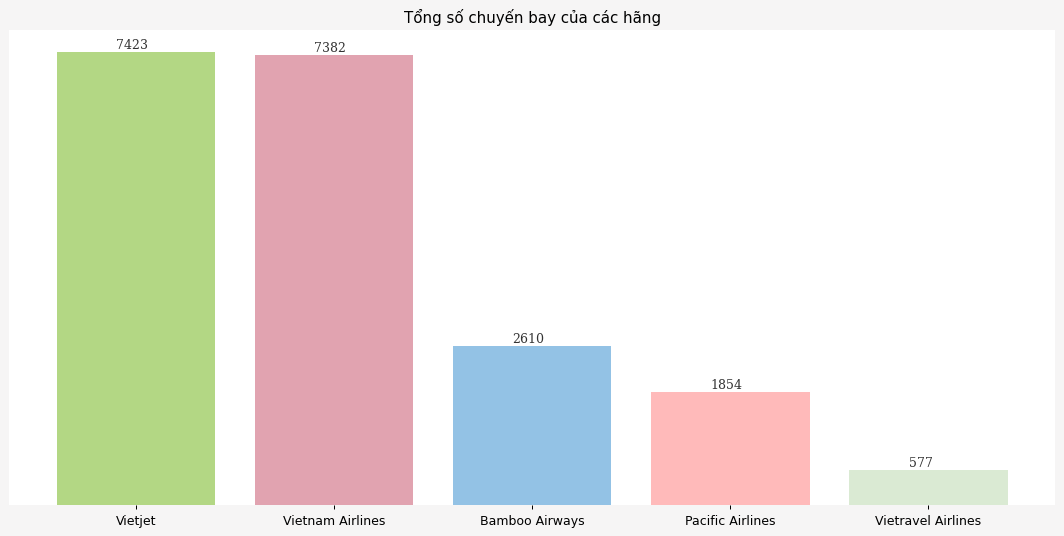

In [22]:
# Chỉnh màu cho nền
fig, ax = plt.subplots (figsize = (15,7) ,dpi = 90)
plt.title('Tổng số chuyến bay của các hãng');
ax.set_facecolor = ('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Giá trị cột
a = flight['hang_bay'].value_counts()
ax.bar( x = a.index, height = a.values, color =['#69b00b','#c44962','#2986cc','#ff7777','#b6d7a8'], alpha = 0.5)

# Hiển thị chữ số trên đồ thị
label = a.values.tolist()
for i in range(len(label)):
    x = i  - 0.35 # khoảng cách chữ và đồ thị cột
    y = (i+18)/2 + label[i]
    x = x +0.25 # tịnh tiến vị trí theo trục X
    y = y + 52 # tịnh tiến vị trí theo trục y
    ax.text(x,y, '{}'.format(a.values[i]),{'font': 'serif', 'weight': 'normal', 'color': 'blacK', 'fontsize': 10}, alpha = 0.8)
    
    
# Xóa các trục
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
    
# Xóa các giá trị đơn vị các trục
ax.axes.get_yaxis().set_visible(False)


### 2,  Tính tổng giờ bay của các hãng, tính số giờ bay theo ngày và đêm

In [23]:
# Chuyển thời gian về dtype timedate64
flight [['cat_canh']] = flight [['cat_canh']] .apply(pd.to_datetime)
flight [['ha_canh']] = flight [['ha_canh']] .apply(pd.to_datetime)

In [24]:
# Lấy pandas thoi_gian để xử lý thời gian bay
thoi_gian = flight [['hang_bay','cat_canh','ha_canh']]

In [25]:
thoi_gian.head()

,hang_bay,cat_canh,ha_canh
0,Vietjet,2021-01-04 04:50:00,2021-01-04 07:10:00
1,Vietnam Airlines,2021-01-04 05:00:00,2021-01-04 07:10:00
2,Vietjet,2021-01-04 05:25:00,2021-01-04 07:35:00
3,Bamboo Airways,2021-01-04 05:45:00,2021-01-04 07:55:00
4,Vietjet,2021-01-04 06:00:00,2021-01-04 08:10:00


In [26]:
# chuyển tổng thời gian bay về dạng giờ

In [27]:
thoi_gian['tong_gio_bay'] =pd.DataFrame( thoi_gian ['ha_canh'] - thoi_gian ['cat_canh'])
thoi_gian['tong_gio_bay'] = pd.DataFrame( thoi_gian['tong_gio_bay']/ np.timedelta64(1, 'h'))
thoi_gian.head()

<ipython-input-27-e58447df1ef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thoi_gian['tong_gio_bay'] =pd.DataFrame( thoi_gian ['ha_canh'] - thoi_gian ['cat_canh'])
<ipython-input-27-e58447df1ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thoi_gian['tong_gio_bay'] = pd.DataFrame( thoi_gian['tong_gio_bay']/ np.timedelta64(1, 'h'))


,hang_bay,cat_canh,ha_canh,tong_gio_bay
0,Vietjet,2021-01-04 04:50:00,2021-01-04 07:10:00,2.333333
1,Vietnam Airlines,2021-01-04 05:00:00,2021-01-04 07:10:00,2.166667
2,Vietjet,2021-01-04 05:25:00,2021-01-04 07:35:00,2.166667
3,Bamboo Airways,2021-01-04 05:45:00,2021-01-04 07:55:00,2.166667
4,Vietjet,2021-01-04 06:00:00,2021-01-04 08:10:00,2.166667


In [29]:
# Group by theo các hãng bay
thoi_gian1 = thoi_gian.groupby ("hang_bay").agg ({"tong_gio_bay":"sum"})

In [30]:
thoi_gian1

,tong_gio_bay
hang_bay,
Bamboo Airways,3999.083333
Pacific Airlines,5108.083333
Vietjet,2641.000000
Vietnam Airlines,21045.416667
Vietravel Airlines,881.833333


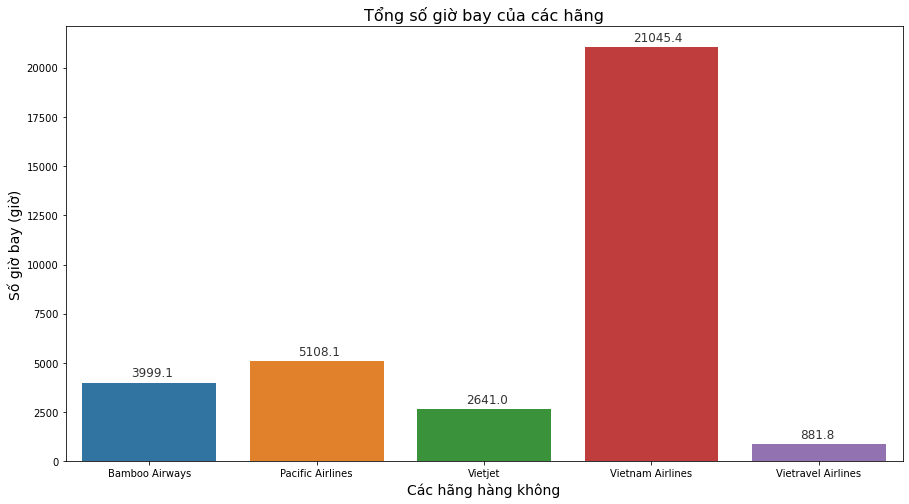

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(y=thoi_gian1['tong_gio_bay'], x=thoi_gian1.index);
plt.title('Tổng số giờ bay của các hãng', size =16);
plt.ylabel("Số giờ bay (giờ)",size = 14)
plt.xlabel("Các hãng hàng không", size = 14);
# Thêm số liệu trên từng cột
N = 5
menMeans = (thoi_gian1['tong_gio_bay'].round(1))
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.11 , y =data+300 , s=f"{data}" , fontdict=dict(fontsize=12), alpha = 0.8)

### 3. Lợi nhuận của các hãng thu về (giá gốc), tiền thuế (giá thuế), tổng doanh thu (giá tổng)

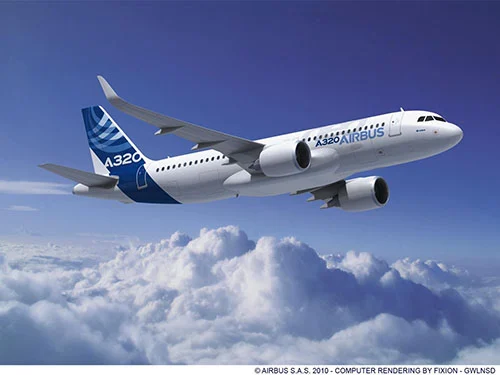
 

Trung bình mỗi chiếc máy bay Airbus A320 sẽ chở được 150 khách vì vậy số tiền trên mỗi chuyến bay sẽ lấy giá vé nhân cho 150 người

In [33]:
# Lấy pandas thoi_gian để xử lý số tiền
tienlai = flight [['hang_bay','gia_goc']]

In [34]:
tienlai['gia_goc']=tienlai['gia_goc']*150
tienlai.head()

<ipython-input-34-77684ebabef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tienlai['gia_goc']=tienlai['gia_goc']*150


,hang_bay,gia_goc
0,Vietjet,29850000
1,Vietnam Airlines,44850000
2,Vietjet,29850000
3,Bamboo Airways,59850000
4,Vietjet,29850000


In [35]:
tienlaix = tienlai.groupby ("hang_bay").agg ({"gia_goc":"sum"})
tienlaix.head()

,gia_goc
hang_bay,
Bamboo Airways,212749200000
Pacific Airlines,74766750000
Vietjet,356324700000
Vietnam Airlines,560440200000
Vietravel Airlines,21601800000


In [36]:
# chuyển về dạng Tỷ VND
tienlaix =tienlaix ['gia_goc']/1000000000

In [37]:
tienlaix.head()

hang_bay
Bamboo Airways        212.74920
Pacific Airlines       74.76675
Vietjet               356.32470
Vietnam Airlines      560.44020
Vietravel Airlines     21.60180
Name: gia_goc, dtype: float64

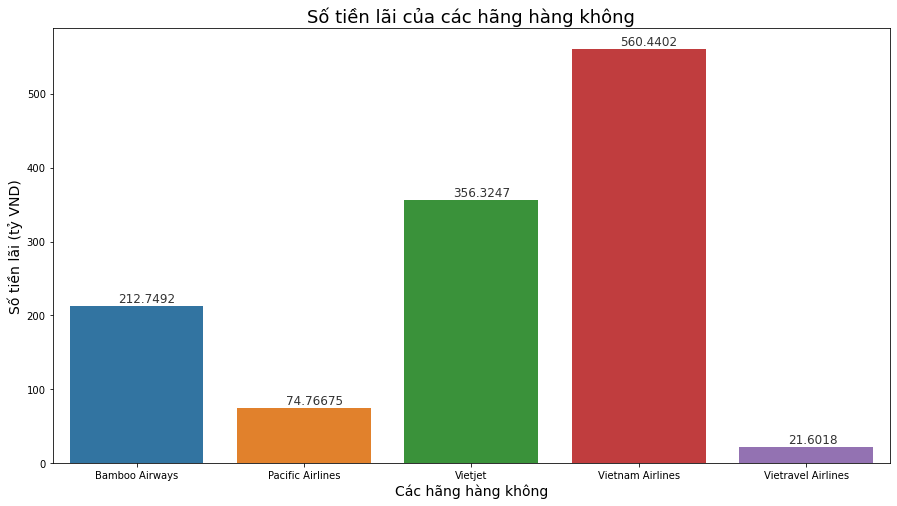

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(y=tienlaix.values, x=tienlaix.index);
plt.title('Số tiền lãi của các hãng hàng không', size =18);
plt.ylabel("Số tiền lãi (tỷ VND)",size = 14)
plt.xlabel("Các hãng hàng không", size = 14);
# Thêm số liệu trên từng cột
N = 5
menMeans = (tienlaix.values)
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.11 , y =data+5 , s=f"{data}" , fontdict=dict(fontsize=12), alpha = 0.8)

In [39]:
# Rút gọn code tính tiền thuế (đơn vị triệu đồng)
tienthue = flight [['hang_bay','gia_thue']]
tienthue['gia_thue'] =tienthue['gia_thue']*150
tienthue = tienthue.groupby ("hang_bay").agg ({"gia_thue":"sum"})
tienthue =tienthue ['gia_thue']/1000000000
tienthue.head()

<ipython-input-39-0038beab7d69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tienthue['gia_thue'] =tienthue['gia_thue']*150


hang_bay
Bamboo Airways        271.175700
Pacific Airlines      185.571150
Vietjet               737.630565
Vietnam Airlines      760.141350
Vietravel Airlines     56.894730
Name: gia_thue, dtype: float64

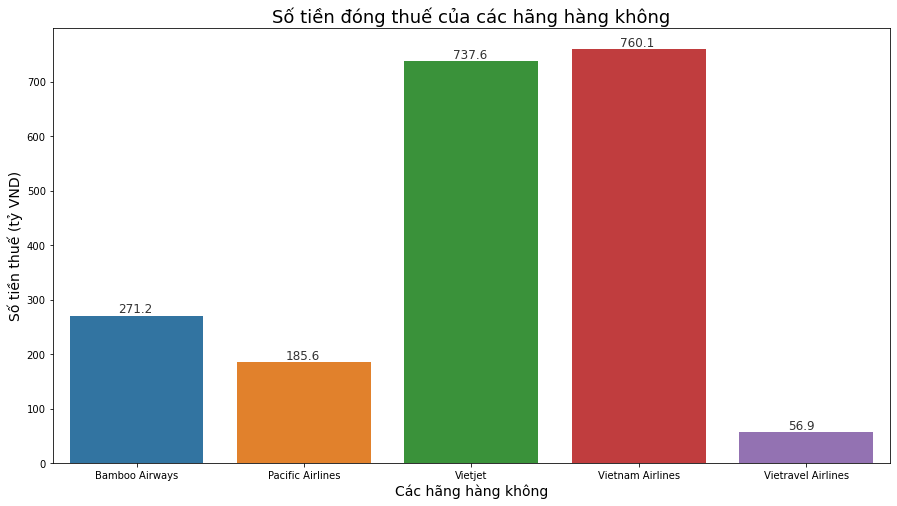

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(y=tienthue.values, x=tienthue.index);
plt.title('Số tiền đóng thuế của các hãng hàng không', size =18);
plt.ylabel("Số tiền thuế (tỷ VND)",size = 14)
plt.xlabel("Các hãng hàng không", size = 14);
# thêm số liệu trên từng cột
N = 5
menMeans = (tienthue.values.round(1))
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.11 , y =data+5 , s=f"{data}" , fontdict=dict(fontsize=12), alpha = 0.8)

In [41]:
# Chuyển tientong và tienthue về pd để gộp 2 pd
tienlaidfx = pd.DataFrame (tienlaix)
tienthuedfx = pd.DataFrame (tienthue)
tien = tienlaidfx.join(tienthuedfx)
tien

,gia_goc,gia_thue
hang_bay,,
Bamboo Airways,212.74920,271.175700
Pacific Airlines,74.76675,185.571150
Vietjet,356.32470,737.630565
Vietnam Airlines,560.44020,760.141350
Vietravel Airlines,21.60180,56.894730


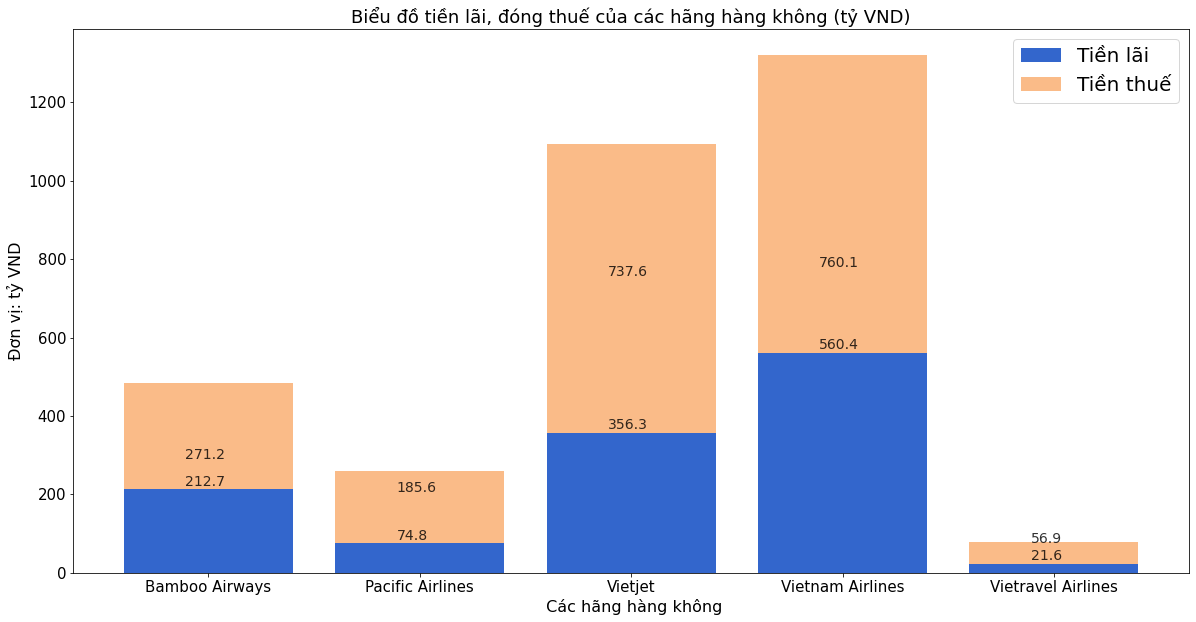

In [42]:
fig = plt.figure(figsize=(20, 10))
plt.bar(tien.index, tien['gia_goc'].values, color='#3366CC')
N = 5
menMeans = (tienthue.values.round(1))
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.11 , y =data+20 , s=f"{data}" , fontdict=dict(fontsize=14), alpha = 0.8)


plt.bar(tien.index, tien['gia_thue'].values,bottom=tien['gia_goc'].values, color='#fabb88')
N = 5
menMeans = (tienlaix.values.round(1))
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.11 , y =data+10 , s=f"{data}" , fontdict=dict(fontsize=14), alpha = 0.8)

plt.xlabel(" Các hãng hàng không", size = 16)
plt.ylabel("Đơn vị: tỷ VND", size = 16)
plt.xticks(fontsize=15) # kích cỡ cột x
plt.yticks(fontsize=15) # kích cỡ cột y
plt.legend(["Tiền lãi", "Tiền thuế"],prop={"size":20})
plt.title("Biểu đồ tiền lãi, đóng thuế của các hãng hàng không (tỷ VND)",size = 18);

Có thể thấy tiền lãi tỷ lệ thuận với số tiền thuế cần đóng
Vietjet đóng số tiền thuế cao so với tỷ lệ tiền lãi

### 4. Thị phần của hàng không Việt Nam (dựa vào số chuyến bay cất cánh)

In [43]:
thiphan = pd.DataFrame(flight['hang_bay'].value_counts().reset_index())
thiphan.rename(columns={'index': 'hang_bay', 'hang_bay': 'so_chuyen_bay'})

,hang_bay,so_chuyen_bay
0,Vietjet,7423
1,Vietnam Airlines,7382
2,Bamboo Airways,2610
3,Pacific Airlines,1854
4,Vietravel Airlines,577


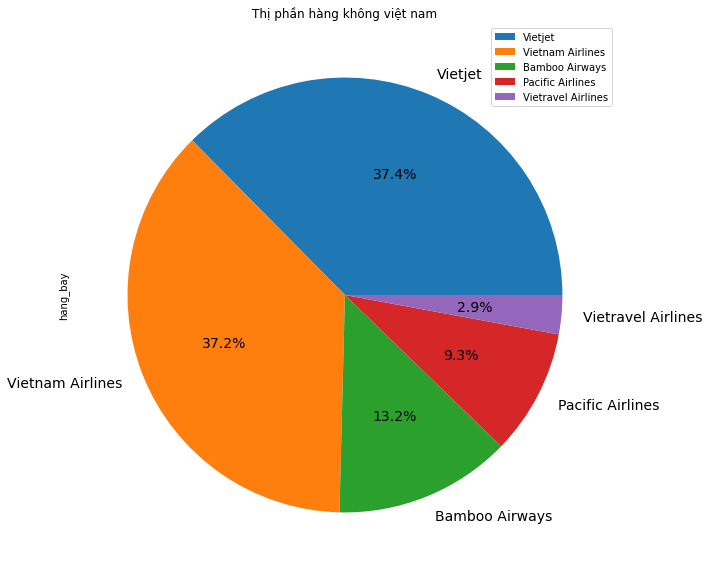

In [44]:
# Note: Gọi tên ở labels phải dùng tên gốc để gọi
labels = thiphan['index']
thiphan.plot.pie(title="Thị phần hàng không việt nam",y='hang_bay',fontsize=14,
        autopct='%1.1f%%', labels = labels ,figsize=(10,10));

Thị phần hàng không tại Việt Nam với VietJet chiếm 37,4% thị phần

 ### 5. Số chuyến bay cất cánh, hạ cánh tại các tỉnh, thành phố

In [45]:
diadiem = flight[['diem_di','san_bay_xp','diem_den','san_bay_hc']]

In [46]:
# dùng nunique để đếm số giá trị của các columns
print(flight['diem_di'].nunique())
print(flight['san_bay_xp'].nunique())
print(flight['diem_den'].nunique())
print(flight['san_bay_hc'].nunique())

13
13
13
13


In [48]:
d1 = pd.DataFrame(diadiem['diem_di'].value_counts())
d2 = pd.DataFrame(diadiem['diem_den'].value_counts())
d = d1.join(d2)
d3 = pd.DataFrame(diadiem['san_bay_xp'].value_counts())
d=d.rename(index={'TP HCM': "TP HCM - Tân Sơn Nhất(SGN) ",
                 "Hà Nội":"Hà Nội - Nội Bài(HAN)",
                "Đà Nẵng":"Đà Nẵng - Đà Nẵng(DAD) ",
                "Phú Quốc":"Phú Quốc - Phú Quốc(PQC)",
                "Nha Trang":"Nha Trang - Cam Ranh (CXR)"
                 , "Đà Lạt":"Đà Lạt - Liên Khương (DLI)",
                 "Vinh":"Vinh - Vinh(VII)",
                 "Hải Phòng":"Hải Phòng - Cát Bi (HPH)",
                "Huế":"Huế - Phú Bài (HUI)",
                  "Thanh Hóa":"Thanh Hóa - Sao Vàng (THD)",
                  "Chu Lai":"Chu Lai - Chu Lai (VCL)"
                 ,"Quy Nhơn":"Quy Nhơn - Phù Cát (UIH)",
                  "Cần Thơ":"Cần Thơ - Cần Thơ (VCA)"})
d

,diem_di,diem_den
TP HCM - Tân Sơn Nhất(SGN),7241,7294
Hà Nội - Nội Bài(HAN),4744,4734
Đà Nẵng - Đà Nẵng(DAD),1901,1883
Phú Quốc - Phú Quốc(PQC),1449,1397
Nha Trang - Cam Ranh (CXR),830,838
Đà Lạt - Liên Khương (DLI),773,781
Vinh - Vinh(VII),587,559
Hải Phòng - Cát Bi (HPH),505,535
Huế - Phú Bài (HUI),470,503
Thanh Hóa - Sao Vàng (THD),429,417


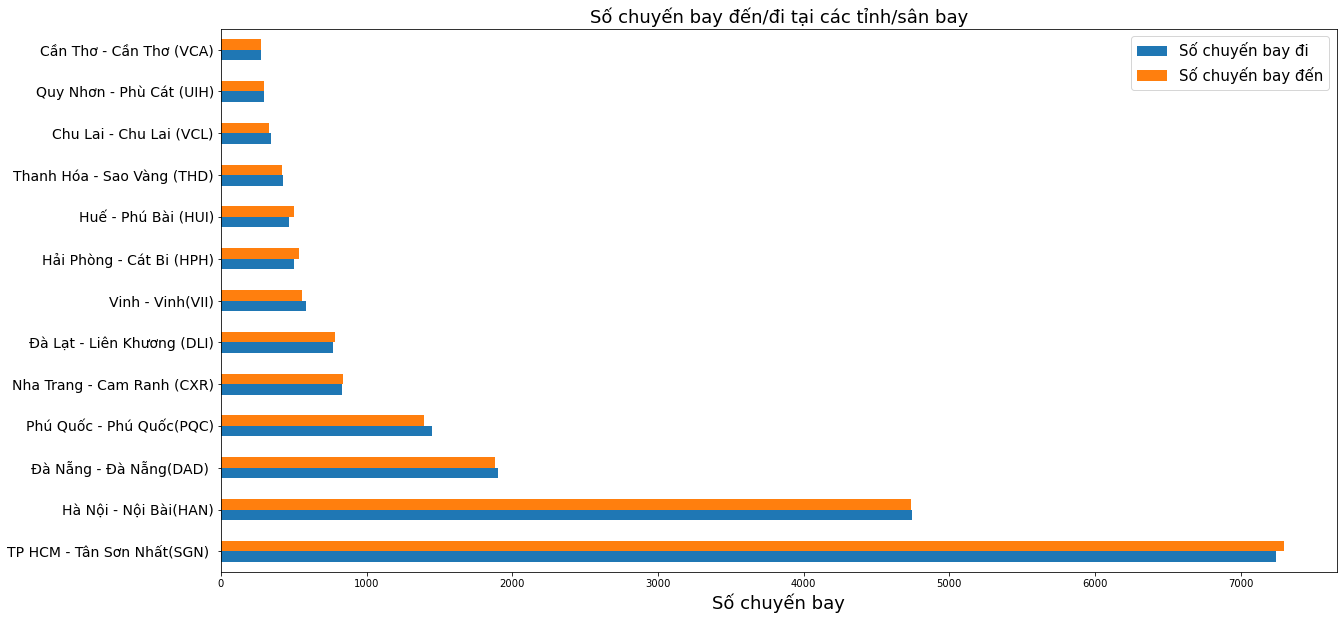

In [49]:
indexx = d.index
diem_di = d['diem_di'].values
diem_den = d['diem_den'].values
dd = pd.DataFrame({'Số chuyến bay đi': diem_di,
                   'Số chuyến bay đến': diem_den}, index=indexx)
ax = dd.plot.barh(figsize=(20, 10))
plt.title('Số chuyến bay đến/đi tại các tỉnh/sân bay',size = (18))
plt.xlabel('Số chuyến bay', size = (18)); 
plt.yticks(fontsize=14) # kích cỡ cột y
plt.legend(prop={"size":15});

### 6. Xử lý chuyến bay liên quan đến thời gian

In [35]:
import datetime as dt
# chuyển giờ cất cánh và hạ cánh về định dạng datetime
flight [['cat_canh']] = flight [['cat_canh']] .apply(pd.to_datetime);
flight [['ha_canh']] = flight [['ha_canh']] .apply(pd.to_datetime);

#### 6.1 Thời gian cất cánh trong ngày thống kê

In [50]:
flight

,code,hang_bay,cat_canh,ha_canh,gia_goc,gia_thue,gia_tong,diem_di,san_bay_xp,diem_den,san_bay_hc,hang_ghe
0,vj,Vietjet,2021-01-04 04:50:00,2021-01-04 07:10:00,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
1,vna,Vietnam Airlines,2021-01-04 05:00:00,2021-01-04 07:10:00,299000,670000,969000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Economy (EL)-P
2,vj,Vietjet,2021-01-04 05:25:00,2021-01-04 07:35:00,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
3,qh,Bamboo Airways,2021-01-04 05:45:00,2021-01-04 07:55:00,399000,672000,1071000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco Saver
4,vj,Vietjet,2021-01-04 06:00:00,2021-01-04 08:10:00,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
...,...,...,...,...,...,...,...,...,...,...,...,...
19841,vj,Vietjet,2021-04-05 14:45:00,2021-04-05 16:25:00,589000,669900,1258900,Quy Nhơn,Phù Cát (UIH),Hà Nội,Nội Bài (HAN),Eco
19842,qh,Bamboo Airways,2021-04-05 15:10:00,2021-04-05 16:50:00,699000,692000,1391000,Quy Nhơn,Phù Cát (UIH),Hà Nội,Nội Bài (HAN),Eco Saver
19843,vna,Vietnam Airlines,2021-04-05 16:30:00,2021-04-05 18:10:00,909000,711000,1620000,Quy Nhơn,Phù Cát (UIH),Hà Nội,Nội Bài (HAN),Economy (EC)-N
19844,qh,Bamboo Airways,2021-04-05 17:45:00,2021-04-05 19:25:00,699000,692000,1391000,Quy Nhơn,Phù Cát (UIH),Hà Nội,Nội Bài (HAN),Eco Saver


In [51]:
thoigian = pd.DataFrame( flight [['diem_di','diem_den','cat_canh','ha_canh']])
thoigian

,diem_di,diem_den,cat_canh,ha_canh
0,TP HCM,Hà Nội,2021-01-04 04:50:00,2021-01-04 07:10:00
1,TP HCM,Hà Nội,2021-01-04 05:00:00,2021-01-04 07:10:00
2,TP HCM,Hà Nội,2021-01-04 05:25:00,2021-01-04 07:35:00
3,TP HCM,Hà Nội,2021-01-04 05:45:00,2021-01-04 07:55:00
4,TP HCM,Hà Nội,2021-01-04 06:00:00,2021-01-04 08:10:00
...,...,...,...,...
19841,Quy Nhơn,Hà Nội,2021-04-05 14:45:00,2021-04-05 16:25:00
19842,Quy Nhơn,Hà Nội,2021-04-05 15:10:00,2021-04-05 16:50:00
19843,Quy Nhơn,Hà Nội,2021-04-05 16:30:00,2021-04-05 18:10:00
19844,Quy Nhơn,Hà Nội,2021-04-05 17:45:00,2021-04-05 19:25:00


In [53]:
# Chuyển thời gian về dạng Hour:Min:Second
thoigian['hourCC'] = pd.to_datetime(thoigian['cat_canh'], format='%H:%M:%S').dt.hour
thoigian['hourHC'] = pd.to_datetime(thoigian['ha_canh'], format='%H:%M:%S').dt.hour

In [54]:
thoigian.head()

,diem_di,diem_den,cat_canh,ha_canh,hourCC,hourHC
0,TP HCM,Hà Nội,2021-01-04 04:50:00,2021-01-04 07:10:00,4,7
1,TP HCM,Hà Nội,2021-01-04 05:00:00,2021-01-04 07:10:00,5,7
2,TP HCM,Hà Nội,2021-01-04 05:25:00,2021-01-04 07:35:00,5,7
3,TP HCM,Hà Nội,2021-01-04 05:45:00,2021-01-04 07:55:00,5,7
4,TP HCM,Hà Nội,2021-01-04 06:00:00,2021-01-04 08:10:00,6,8


In [55]:
tc =pd.DataFrame(thoigian['hourCC'].value_counts().sort_values(ascending=False))
tc =pd.DataFrame(tc.sort_index())
th =pd.DataFrame(thoigian['hourHC'].value_counts().sort_values(ascending=False))
th =pd.DataFrame(th.sort_index())
t = pd.concat([th,tc], axis = 1)
t=t.fillna(0)
t.head()
# vậy chuyến bay sớm cất cánh sớm nhất vào 4:00AM
# vậy chuyến bay hạ cánh sớm nhất là 0h AM và từ 2h đến 5h không có sân bay nào có máy bay đáp xuống

,hourHC,hourCC
0,483.0,0.0
1,125.0,0.0
4,0.0,33.0
5,0.0,623.0
6,104.0,974.0


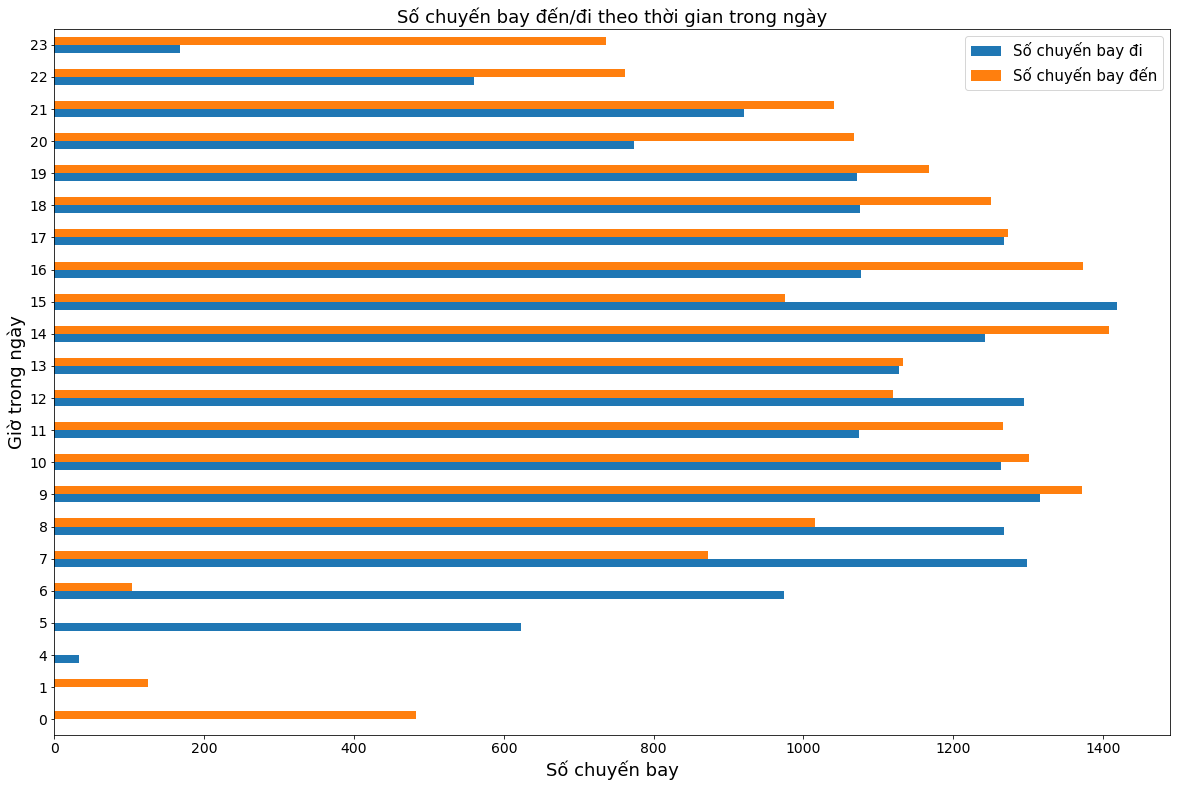

In [56]:
indexxx = t.index
hourCC = t['hourCC'].values
hourHC = t['hourHC'].values
tt = pd.DataFrame({'Số chuyến bay đi': hourCC,
                   'Số chuyến bay đến': hourHC}, index=indexxx)
ax = tt.plot.barh(figsize=(20, 13))

plt.title('Số chuyến bay đến/đi theo thời gian trong ngày',size = (18))
plt.xlabel('Số chuyến bay', size = (18)); 
plt.ylabel('Giờ trong ngày', size = (18)); 
plt.xticks(fontsize=14) # kích cỡ cột x
plt.yticks(fontsize=14) # kích cỡ cột y
plt.legend(prop={"size":15});

#### 6.2 Thời gian cất/hạ cánh bay thống kê theo buổi

In [42]:
thoigian['buoiCC']=thoigian['hourCC'].apply(lambda x: 'Sang' if 0<x<=11 else( 'Trua' if 11<x<=13 else ('Chieu' if 13<x<=19 else 'Toi' )))

thoigian['buoiHC']=thoigian['hourHC'].apply(lambda x: 'Sang' if 0<x<=11 else( 'Trua' if 11<x<=13 else ('Chieu' if 13<x<=19 else 'Toi' )))
thoigian

,diem_di,diem_den,cat_canh,ha_canh,hourCC,hourHC,buoiCC,buoiHC
0,TP HCM,Hà Nội,2021-01-04 04:50:00,2021-01-04 07:10:00,4,7,Sang,Sang
1,TP HCM,Hà Nội,2021-01-04 05:00:00,2021-01-04 07:10:00,5,7,Sang,Sang
2,TP HCM,Hà Nội,2021-01-04 05:25:00,2021-01-04 07:35:00,5,7,Sang,Sang
3,TP HCM,Hà Nội,2021-01-04 05:45:00,2021-01-04 07:55:00,5,7,Sang,Sang
4,TP HCM,Hà Nội,2021-01-04 06:00:00,2021-01-04 08:10:00,6,8,Sang,Sang
...,...,...,...,...,...,...,...,...
19841,Quy Nhơn,Hà Nội,2021-04-05 14:45:00,2021-04-05 16:25:00,14,16,Chieu,Chieu
19842,Quy Nhơn,Hà Nội,2021-04-05 15:10:00,2021-04-05 16:50:00,15,16,Chieu,Chieu
19843,Quy Nhơn,Hà Nội,2021-04-05 16:30:00,2021-04-05 18:10:00,16,18,Chieu,Chieu
19844,Quy Nhơn,Hà Nội,2021-04-05 17:45:00,2021-04-05 19:25:00,17,19,Chieu,Chieu


In [43]:
b = pd.DataFrame(thoigian['buoiCC'].value_counts())
c = pd.DataFrame(thoigian['buoiHC'].value_counts())
b.head()

,buoiCC
Sang,7850
Chieu,7152
Trua,2422
Toi,2422


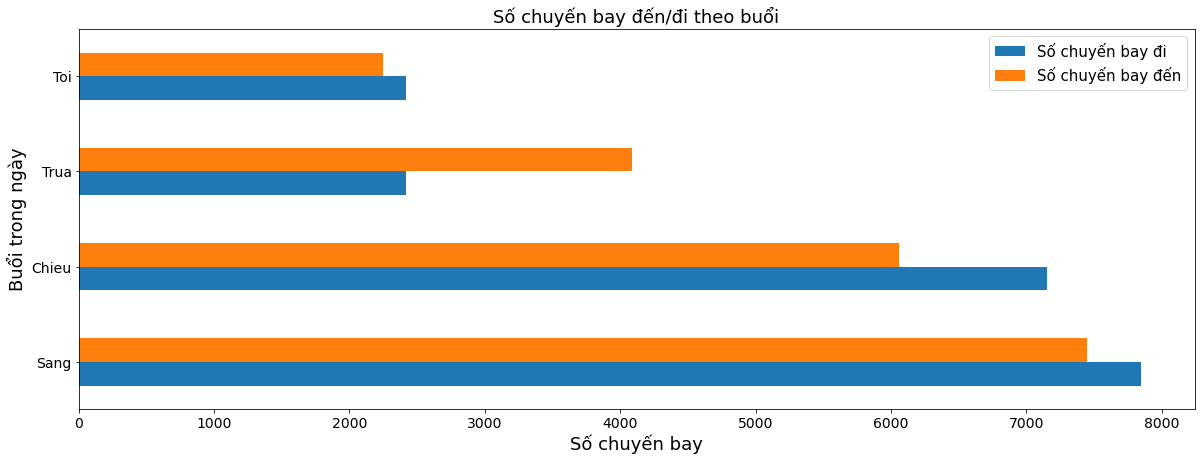

In [44]:
indexxxx = b.index
buoiCC = b['buoiCC'].values
buoiHC = c['buoiHC'].values
bc = pd.DataFrame({'Số chuyến bay đi': buoiCC,
                   'Số chuyến bay đến': buoiHC}, index=indexxxx)
ax = bc.plot.barh(figsize=(20, 7))

plt.title('Số chuyến bay đến/đi theo buổi',size = (18))
plt.xlabel('Số chuyến bay', size = (18)); 
plt.ylabel('Buổi trong ngày', size = (18)); 
plt.xticks(fontsize=14) # kích cỡ cột x
plt.yticks(fontsize=14) # kích cỡ cột y
plt.legend(prop={"size":15});

#### 6.3. Thống kê về số chuyến bay cất cánh hạ cánh tại 3 sân bay lớn nhất VN

Thống kê theo 3 sân bay lớn nhất với số chuyến bay cất/hạ cánh là TP Hồ Chí Minh (Tân Sơn Nhất), Hà Nội (Nội Bài), Đà Nẵng (Đà Nẵng)

In [57]:
hanoidi = thoigian.loc [thoigian['diem_di'] == 'Hà Nội']
hanoiden = thoigian.loc [thoigian['diem_den'] == 'Hà Nội']
tphcmdi = thoigian.loc [thoigian['diem_di'] == 'TP HCM']
tphcmden = thoigian.loc [thoigian['diem_den'] == 'TP HCM']
danangdi = thoigian.loc [thoigian['diem_di'] == 'Đà Nẵng']
danangden = thoigian.loc [thoigian['diem_di'] == 'Đà Nẵng']

In [58]:
hanoidi.head()

,diem_di,diem_den,cat_canh,ha_canh,hourCC,hourHC
60,Hà Nội,TP HCM,2021-01-04 05:00:00,2021-01-04 07:15:00,5,7
61,Hà Nội,TP HCM,2021-01-04 05:10:00,2021-01-04 07:20:00,5,7
62,Hà Nội,TP HCM,2021-01-04 05:50:00,2021-01-04 07:55:00,5,7
63,Hà Nội,TP HCM,2021-01-04 05:55:00,2021-01-04 08:10:00,5,8
64,Hà Nội,TP HCM,2021-01-04 06:00:00,2021-01-04 08:15:00,6,8


In [59]:
# cất cánh hạ cánh tại HÀ NỘI trong 24h
hnc =pd.DataFrame(hanoidi['hourCC'].value_counts().sort_values(ascending=False))
hnc =pd.DataFrame(hnc.sort_index())
hnd =pd.DataFrame(hanoiden['hourHC'].value_counts().sort_values(ascending=False))
hnd =pd.DataFrame(hnd.sort_index())
hn = pd.concat([hnc,hnd], axis = 1)
hn=hn.fillna(0)
hn.rename(columns = {'hourCC':'Hanoi_catcanh','hourHC':'Hanoi_hacanh'},inplace=True)
hn.head()

,Hanoi_catcanh,Hanoi_hacanh
0,0.0,168.0
1,0.0,62.0
5,342.0,0.0
6,234.0,4.0
7,453.0,136.0


In [60]:
# cất cánh hạ cánh tại SÀI GÒN trong 24h
sgc =pd.DataFrame(tphcmdi['hourCC'].value_counts().sort_values(ascending=False))
sgc =pd.DataFrame(sgc.sort_index())
sgd =pd.DataFrame(tphcmden['hourHC'].value_counts().sort_values(ascending=False))
sgd =pd.DataFrame(sgd.sort_index())
sg = pd.concat([sgd,sgc], axis = 1)
sg=sg.fillna(0)
sg.rename(columns = {'hourCC':'TPHCM_catcanh','hourHC':'TPHCM_hacanh'},inplace=True)
sg.head()

,TPHCM_hacanh,TPHCM_catcanh
0,285.0,0.0
1,63.0,0.0
4,0.0,33.0
5,0.0,281.0
6,0.0,667.0


In [61]:
# cất cánh hạ cánh tại SÀI GÒN trong 24h
dnc =pd.DataFrame(danangdi['hourCC'].value_counts().sort_values(ascending=False))
dnc =pd.DataFrame(dnc.sort_index())
dnd =pd.DataFrame(danangden['hourHC'].value_counts().sort_values(ascending=False))
dnd =pd.DataFrame(dnd.sort_index())
dn = pd.concat([dnd,dnc], axis = 1)
dn=dn.fillna(0)
dn.rename(columns = {'hourCC':'Danang_catcanh','hourHC':'Danang_hacanh'},inplace=True)
dn.head()

,Danang_hacanh,Danang_catcanh
0,138.0,0.0
6,0.0,38.0
7,29.0,136.0
8,88.0,175.0
9,194.0,144.0


In [62]:
tall = pd.concat([hn,sg,dn], axis = 1)
tall = tall.fillna(0)
tall.head()

,Hanoi_catcanh,Hanoi_hacanh,TPHCM_hacanh,TPHCM_catcanh,Danang_hacanh,Danang_catcanh
0,0.0,168.0,285.0,0.0,138.0,0.0
1,0.0,62.0,63.0,0.0,0.0,0.0
4,0.0,0.0,0.0,33.0,0.0,0.0
5,342.0,0.0,0.0,281.0,0.0,0.0
6,234.0,4.0,0.0,667.0,0.0,38.0


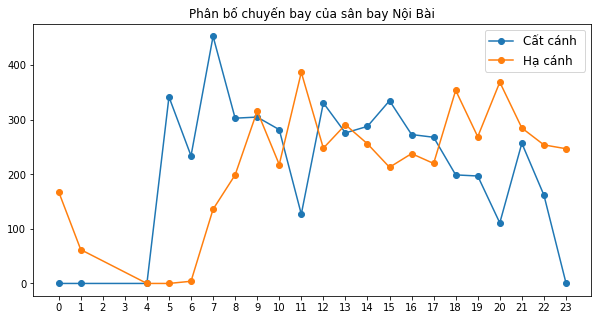

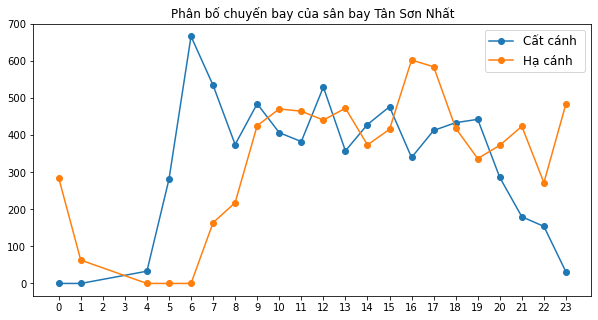

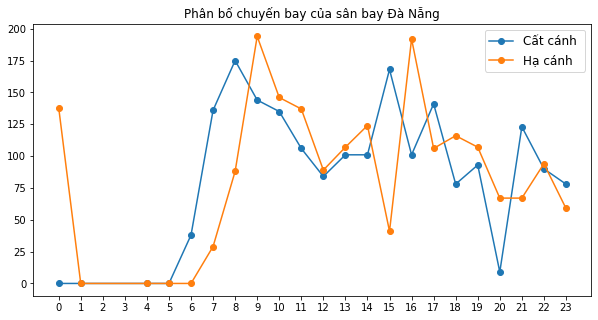

In [63]:
fig = plt.figure(figsize=(10, 5))

plt.title('Phân bố chuyến bay của sân bay Nội Bài');

plt.plot(tall['Hanoi_catcanh'],marker="o");
plt.plot(tall['Hanoi_hacanh'],marker="o");
plt.xticks(np.arange(0,24,1))
plt.legend(["Cất cánh ", "Hạ cánh "],prop={"size":12})

fig = plt.figure(figsize=(10, 5))
plt.title('Phân bố chuyến bay của sân bay Tân Sơn Nhất');
plt.plot(tall['TPHCM_catcanh'],marker="o");
plt.plot(tall['TPHCM_hacanh'],marker="o");
plt.xticks(np.arange(0,24,1))
plt.legend(["Cất cánh ", "Hạ cánh "],prop={"size":12});

fig = plt.figure(figsize=(10, 5))
plt.title('Phân bố chuyến bay của sân bay Đà Nẵng');
plt.plot(tall['Danang_catcanh'],marker="o");
plt.plot(tall['Danang_hacanh'],marker="o");
plt.xticks(np.arange(0,24,1))
plt.legend(["Cất cánh ", "Hạ cánh"],prop={"size":12});

In [64]:
thoigian2 =thoigian

In [65]:
thoigian2['ha_canh'] = thoigian['ha_canh'].dt.strftime("%m/%d/%y")
thoigian2['cat_canh'] = thoigian['cat_canh'].dt.strftime("%m/%d/%y")

In [66]:
thoigian2

,diem_di,diem_den,cat_canh,ha_canh,hourCC,hourHC
0,TP HCM,Hà Nội,01/04/21,01/04/21,4,7
1,TP HCM,Hà Nội,01/04/21,01/04/21,5,7
2,TP HCM,Hà Nội,01/04/21,01/04/21,5,7
3,TP HCM,Hà Nội,01/04/21,01/04/21,5,7
4,TP HCM,Hà Nội,01/04/21,01/04/21,6,8
...,...,...,...,...,...,...
19841,Quy Nhơn,Hà Nội,04/05/21,04/05/21,14,16
19842,Quy Nhơn,Hà Nội,04/05/21,04/05/21,15,16
19843,Quy Nhơn,Hà Nội,04/05/21,04/05/21,16,18
19844,Quy Nhơn,Hà Nội,04/05/21,04/05/21,17,19


In [67]:
print(thoigian2['cat_canh'].max())
print(thoigian2['cat_canh'].min())
print(thoigian2['ha_canh'].max())
print(thoigian2['ha_canh'].min())
# có thể thấy thời gian thống kê từ mùng 4/1 đến 4/12

12/04/21
01/04/21
12/04/21
01/04/21


In [68]:
catcanh = thoigian2[['cat_canh']]
catcanh = pd.DataFrame(catcanh.value_counts())
catcanh = catcanh.sort_values(by='cat_canh', ascending=True)
catcanh.head()

,0
cat_canh,
01/04/21,565
01/05/21,608
02/04/21,596
02/05/21,579
03/04/21,571


In [69]:
catcanh.columns =['cat_canh']
catcanh.index.nunique()
# chỉ 34 ngày được thống kê

34

In [70]:
hacanh = thoigian2[['ha_canh']]
hacanh = pd.DataFrame(hacanh.value_counts())
hacanh = hacanh.sort_values(by='ha_canh', ascending=True)


In [71]:
hacanh.columns =['ha_canh']
hacanh.index.unique()
# chỉ 35 ngày được thống kê


MultiIndex([('01/04/21',),
            ('01/05/21',),
            ('02/04/21',),
            ('02/05/21',),
            ('03/04/21',),
            ('03/05/21',),
            ('04/04/21',),
            ('04/05/21',),
            ('04/13/21',),
            ('04/14/21',),
            ('04/15/21',),
            ('04/16/21',),
            ('04/17/21',),
            ('04/18/21',),
            ('04/19/21',),
            ('04/20/21',),
            ('04/21/21',),
            ('04/22/21',),
            ('04/23/21',),
            ('04/24/21',),
            ('04/25/21',),
            ('04/26/21',),
            ('04/27/21',),
            ('04/28/21',),
            ('04/29/21',),
            ('04/30/21',),
            ('05/04/21',),
            ('05/05/21',),
            ('06/04/21',),
            ('07/04/21',),
            ('08/04/21',),
            ('09/04/21',),
            ('10/04/21',),
            ('11/04/21',),
            ('12/04/21',)],
           names=['ha_canh'])

In [72]:
aaa = pd.concat([hacanh,catcanh], axis = 1)
aaa=aaa.fillna(0)
aaa.rename(columns = {'0':'So Ca Nhiem'},inplace=True)

In [73]:
aaa.reset_index()
aaa.head()

,ha_canh,cat_canh
01/04/21,560,565.0
01/05/21,608,608.0
02/04/21,597,596.0
02/05/21,579,579.0
03/04/21,570,571.0


### 7. Thống kê hạng vé

In [74]:
hangghe = pd.DataFrame(flight['hang_ghe'].value_counts())

In [75]:
hangghe =hangghe.loc [hangghe['hang_ghe'] >200]
hangghe

,hang_ghe
Eco,7348
Economy (EL)-A,3693
Economy (EL)-P,2379
Eco Saver,2014
Economy (EC)-E,684
Economy (EC)-T,619
Economy (EC)-R,407
Economy (EG)-M,277
Aregow (A) - Vé không hoàn,263
Economy (EC)-N,254


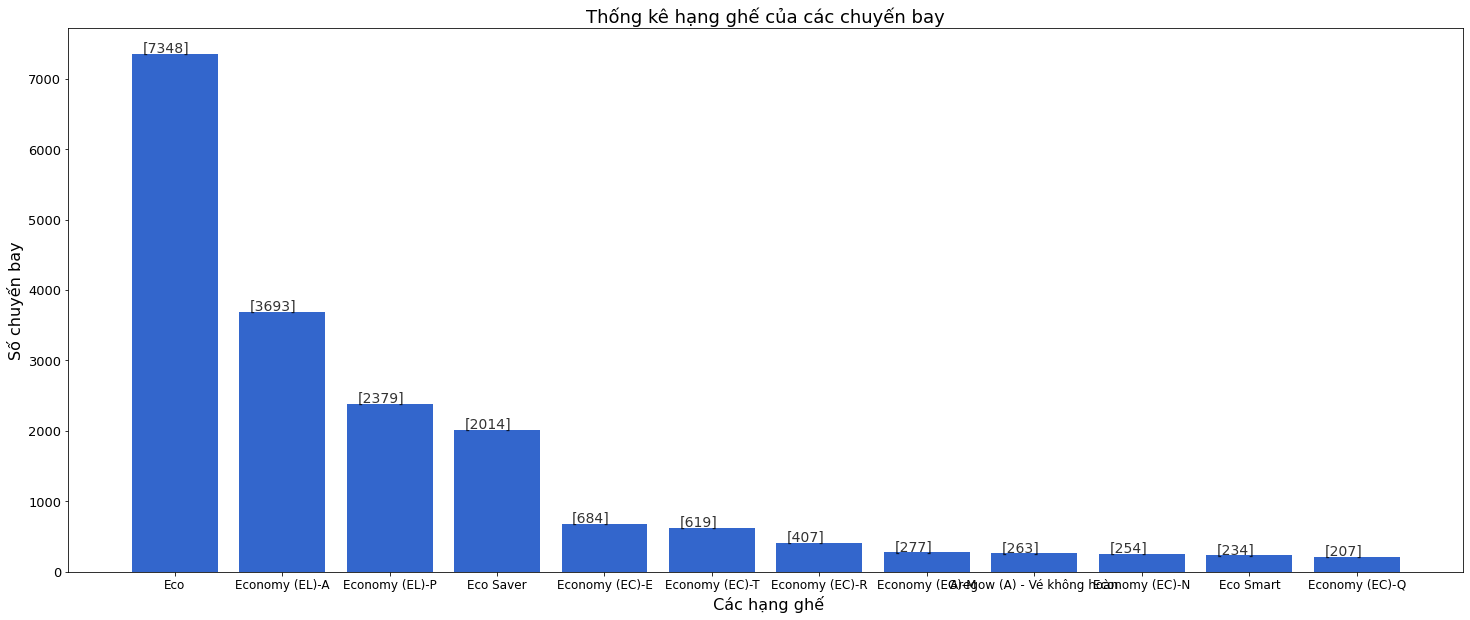

In [76]:
fig = plt.figure(figsize=(25, 10))
plt.bar(hangghe.index, hangghe['hang_ghe'].values, color='#3366CC')
N = 5
menMeans = (hangghe.values.round(1))
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.30 , y =data+20 , s=f"{data}" , fontdict=dict(fontsize=14), alpha = 0.8)
    
plt.xlabel(" Các hạng ghế", size = 16)
plt.ylabel("Số chuyến bay", size = 16)
plt.xticks(fontsize=12) # kích cỡ cột y
plt.yticks(fontsize=13) # kích cỡ cột y
plt.title("Thống kê hạng ghế của các chuyến bay",size = 18);

### 8. Thống kê thời gian bay từ sân bay nội bài - hà nội đến các sân bay khác

In [77]:
noibai =flight.loc [flight['diem_di'] =='Hà Nội']
noibai.head()

,code,hang_bay,cat_canh,ha_canh,gia_goc,gia_thue,gia_tong,diem_di,san_bay_xp,diem_den,san_bay_hc,hang_ghe
60,vna,Vietnam Airlines,2021-01-04 05:00:00,2021-01-04 07:15:00,299000,670000,969000,Hà Nội,Nội Bài (HAN),TP HCM,Tân Sơn Nhất (SGN),Economy (EL)-P
61,vj,Vietjet,2021-01-04 05:10:00,2021-01-04 07:20:00,199000,650900,849900,Hà Nội,Nội Bài (HAN),TP HCM,Tân Sơn Nhất (SGN),Eco
62,qh,Bamboo Airways,2021-01-04 05:50:00,2021-01-04 07:55:00,299000,672000,971000,Hà Nội,Nội Bài (HAN),TP HCM,Tân Sơn Nhất (SGN),Eco Saver
63,vta,Vietravel Airlines,2021-01-04 05:55:00,2021-01-04 08:10:00,390000,660000,1050000,Hà Nội,Nội Bài (HAN),TP HCM,Tân Sơn Nhất (SGN),Bregow (B) - Vé không hoàn
64,vna,Vietnam Airlines,2021-01-04 06:00:00,2021-01-04 08:15:00,299000,670000,969000,Hà Nội,Nội Bài (HAN),TP HCM,Tân Sơn Nhất (SGN),Economy (EL)-P


In [78]:
noibai ['thoi_gian_bay'] =noibai ['ha_canh'] -noibai ['cat_canh']

<ipython-input-78-c45a1d17f844>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noibai ['thoi_gian_bay'] =noibai ['ha_canh'] -noibai ['cat_canh']


In [79]:
nb = pd.DataFrame(noibai[['diem_den','thoi_gian_bay']])

In [80]:
nb

,diem_den,thoi_gian_bay
60,TP HCM,0 days 02:15:00
61,TP HCM,0 days 02:10:00
62,TP HCM,0 days 02:05:00
63,TP HCM,0 days 02:15:00
64,TP HCM,0 days 02:15:00
...,...,...
19832,Quy Nhơn,0 days 01:35:00
19833,Quy Nhơn,0 days 01:40:00
19834,Quy Nhơn,0 days 01:50:00
19835,Quy Nhơn,0 days 01:40:00


In [81]:
nb.value_counts().head()

diem_den  thoi_gian_bay  
TP HCM    0 days 02:15:00    803
          0 days 02:10:00    566
Phú Quốc  0 days 02:05:00    432
Đà Nẵng   0 days 01:25:00    388
          0 days 01:20:00    355
dtype: int64

#### Thống kê địa điểm tới của các máy bay cất cánh tại SB nội bài

In [82]:
noibai['diem_den'].value_counts()

TP HCM       2086
Đà Nẵng       751
Phú Quốc      591
Nha Trang     395
Đà Lạt        347
Quy Nhơn      295
Cần Thơ       279
Name: diem_den, dtype: int64

In [83]:
sbnb =pd.DataFrame(noibai['diem_den'].value_counts())

In [72]:
sbnb

,diem_den
TP HCM,2086
Đà Nẵng,751
Phú Quốc,591
Nha Trang,395
Đà Lạt,347
Quy Nhơn,295
Cần Thơ,279


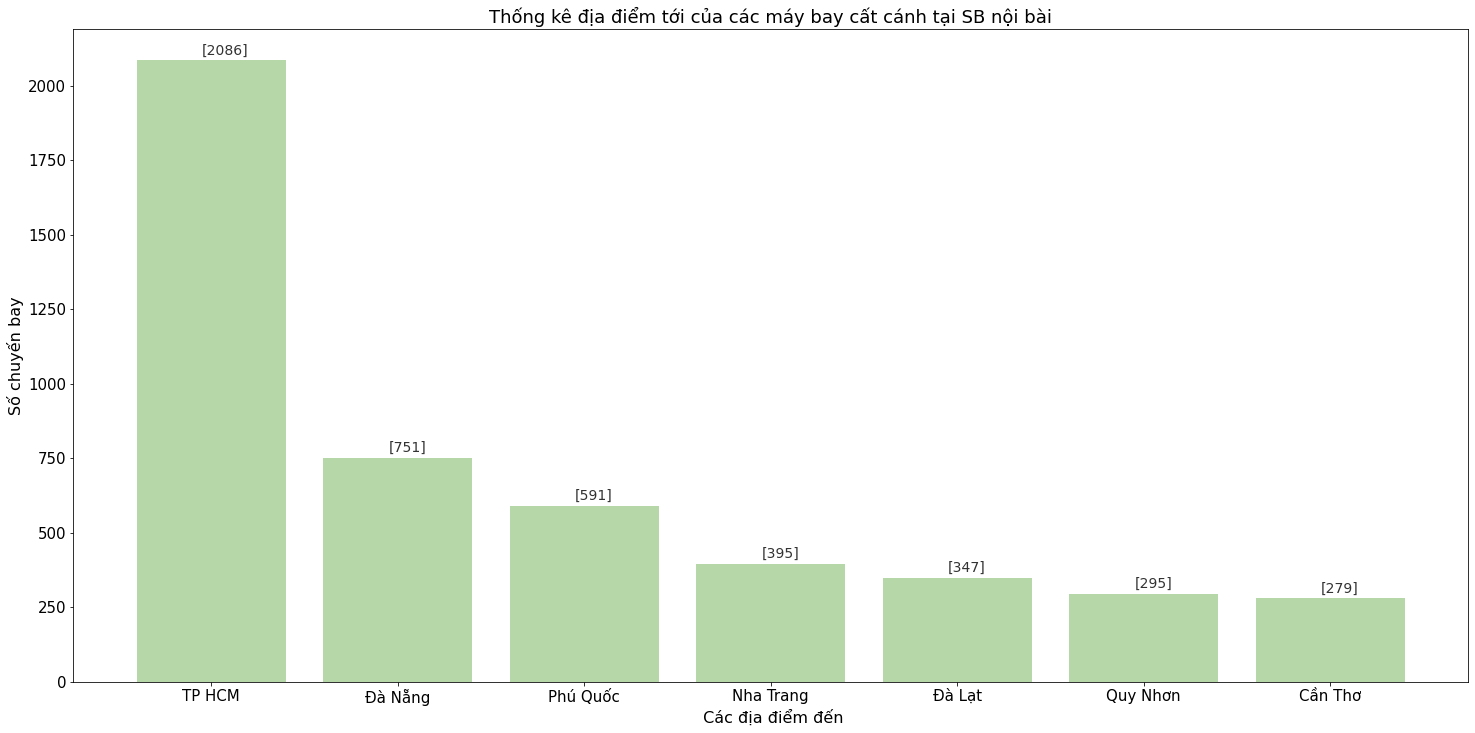

In [73]:
fig = plt.figure(figsize=(25, 12))
plt.bar(sbnb.index, sbnb['diem_den'].values, color='#b6d7a8')
N = 5
menMeans = (sbnb.values.round(1))
ind = np.arange(N)
for index,data in enumerate(menMeans):
    plt.text(x=index-0.05 , y =data+20 , s=f"{data}" , fontdict=dict(fontsize=14), alpha = 0.8)
    
plt.xlabel(" Các địa điểm đến", size = 16)
plt.ylabel("Số chuyến bay", size = 16)
plt.xticks(fontsize=15) # kích cỡ cột x
plt.yticks(fontsize=15) # kích cỡ cột y
plt.title("Thống kê địa điểm tới của các máy bay cất cánh tại SB nội bài",size = 18);

## 5. Tổng kết

Dựa vào số liệu đã thống kê cho thấy:
   - Tổng số chuyến bay của các hãng dẫn đầu là Viejet với 7423 chuyến bay kết tiếp là VietName Airlines với 7382 chuyến bay được khởi hành, các hãng hàng không còn lại đều dưới 3000 chuyến bay
 - Tuy tổng số chuyến bay đứng thứ 2 nhưng số giờ bay của Vietnam Airlines là hơn 21000 giờ bay rất cao so với Vietjet Air (2641 giờ bay) cho thấy VN Airline bị ảnh hưởng của nhiều điều kiện thời tiết hoặc là do chặng bay xa hơn
- Số tiền lãi thu về tiếp tục thuộc về VN Airlines với hơn 560 tỷ VND còn Vietjet là hãng hàng không giá rẻ nên chỉ 356 tỷ VND, sau đó là hãng hàng không non trẻ Bamboo Airway của chủ tịch Trịnh Văn Quyết là 212 tỷ VND
- Số tiền thuế thường tỷ lệ với doanh thu nên số tiền thuế của VN Airlines và VietJet là hơn 700 tỷ đồng thấp nhất là Viettravel với 57 tỷ VND
- Xét về các sân bay tại các tỉnh
- Tân Sơn Nhất dẫn đầu số chuyến bay với hơn 7000 chuyến bay cất và hạ cánh, tiếp theo là thủ đô Hà Nội với sân bay quốc tế Nội Bài với hơn 4500 chuyến cất và hạ cánh thấp nhất là tỉnh cần thơ với chưa đầy 400 chuyến bay và hạ cánh
- Về giờ bay cho thấy số chuyến bay đến vào buổi chiều cao hơn buổi sáng và khoảng 14-15h là có số chuyến bay cất-hạ cánh nhiều nhất
- Về hạng ghế cho thấy hạng ghế ECO là phổ biến nhất của các hãng bay với hơn 7300 chuyến bay là hạng ECO

Năm 2021 sẽ là một năm đầy sóng gió với nền kinh tế Việt Nam nói chung và ngành hàng không nói riêng. Chúng ta hãy cùng chung tay đẩy lùi dịch bệnh để được đi những chuyến bay đến những vùng đất mới nhé!